<a href="https://colab.research.google.com/github/divakar9819/Deep_Learning_implementation/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Loading dataset

In [2]:
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.MNIST(root='./data', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor())

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [0]:
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

# Visualisation

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

In [12]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[1].shape)
print(labels[1].item())

torch.Size([4, 1, 28, 28])
torch.Size([1, 28, 28])
2


In [13]:
img = images[1]
print(type(img))

<class 'torch.Tensor'>


In [26]:
npimg = img.numpy()
print(npimg.shape)

(1, 28, 28)


In [27]:
npimg = np.transpose(npimg, (1, 2, 0))
print(npimg.shape)

(28, 28, 1)


In [0]:
plt.figure(figsize = (1,1))
plt.imshow(npimg)
plt.show()

In [0]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

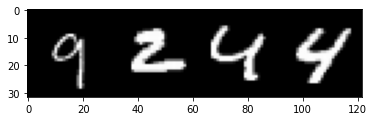

9 2 4 4


In [25]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

# First CNN Model

In [0]:
import torch.nn as nn

class FirstCNN(nn.Module):
    def __init__(self): 
        super(FirstCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=(1,1), stride=(2,2)) # padding=(1,1), stride=(2,2))
        
    def forward(self, x):
        x = self.conv1(x)
        return x

In [0]:
net = FirstCNN()

In [32]:
out = net(images)
out.shape

torch.Size([4, 16, 14, 14])

In [33]:
for param in net.parameters():
    print(param.shape)

torch.Size([16, 1, 3, 3])
torch.Size([16])


In [34]:
out1 = out[0, 0, :, :].detach().numpy()
print(out1.shape)

(14, 14)


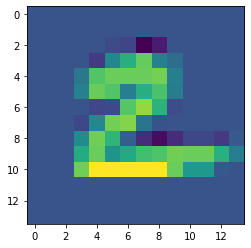

In [37]:
plt.imshow(out[1, 0, :, :].detach().numpy())
plt.show()

### Deep CNN Model

In [0]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(1, 6, 3),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 3),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        #print(x.shape)
        x = self.cnn_model(x)
        #print(x.shape)
        x = x.view(x.size(0), -1)
        #print(x.shape)
        x = self.fc_model(x)
        #print(x.shape)
        return x

In [42]:
net = LeNet()
out = net(images)

torch.Size([4, 1, 28, 28])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [43]:
print(out)

tensor([[ 0.1522,  0.0107, -0.0994, -0.0423,  0.1139,  0.0906, -0.0608,  0.0808,
          0.0607,  0.0271],
        [ 0.1240,  0.0116, -0.0757,  0.0043,  0.0897,  0.0409, -0.0601,  0.0806,
          0.0339,  0.0441],
        [ 0.1474,  0.0331, -0.1024, -0.0395,  0.1120,  0.0627, -0.0617,  0.0986,
          0.0576,  0.0087],
        [ 0.1376,  0.0401, -0.0985, -0.0418,  0.1085,  0.0616, -0.0607,  0.1192,
          0.0477,  0.0311]], grad_fn=<AddmmBackward>)


In [44]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([0, 0, 0, 0])


In [0]:
batch_size = 128
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
#testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
#testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [48]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# Training Model

In [0]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [0]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = torch.optim.Adam(net.parameters())
#opt = torch.optim.Adam(net.parameters(), lr=0.001, betas=(0.8, 0.899), eps=1e-08, weight_decay=0, amsgrad=False)

In [57]:
%%time
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
    print('Epoch: %d/%d' % (epoch, max_epochs))

Epoch: 0/16
Epoch: 1/16
Epoch: 2/16
Epoch: 3/16
Epoch: 4/16
Epoch: 5/16
Epoch: 6/16
Epoch: 7/16
Epoch: 8/16
Epoch: 9/16
Epoch: 10/16
Epoch: 11/16
Epoch: 12/16
Epoch: 13/16
Epoch: 14/16
Epoch: 15/16
CPU times: user 2min 8s, sys: 957 ms, total: 2min 9s
Wall time: 2min 9s


In [58]:
print(' Train acc: %0.2f' % (evaluation(trainloader)))

 Train acc: 99.75


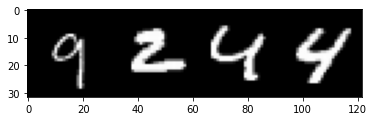

In [59]:
imshow(torchvision.utils.make_grid(images))

In [0]:
net = net.to('cpu')

In [61]:
out = net(images)
print(out.shape)

torch.Size([4, 10])


In [62]:
out = net.cnn_model[0](images)
out.shape

torch.Size([4, 6, 26, 26])

In [0]:
image_id = 3
plt.figure(figsize = (2,2))
imshow(images[image_id,])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


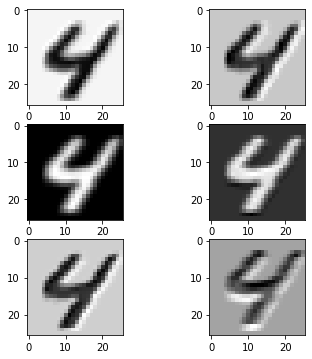

In [64]:
plt.figure(figsize = (6,6))
plt.subplot(321)
for i in range(6):
    ax1 = plt.subplot(3, 2, i+1)
    plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap="binary")
plt.show()